In [24]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv', encoding='utf-8')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [70]:
df.drop(['2P',  'AST', 'STL'], axis=1, inplace=True)

In [71]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
train.head()
len(train)

80

In [72]:
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")
test.head()
len(test)

20

## SVM 최적의 파라미터 찾기
#### SVM(서포트벡터머신)의 파라미터는 두가지가 있습니다.

C : 비용 (cost), 결정경계선의 마진을 결정하는 파라미터입니다.
gamma: 커널의 데이터포인트의 표준편차를 결정하는 파라미터입니다.
결과적으로 C가 클수록, 결정경계선과 서포트 벡터의 간격(마진)이 작아집니다.
결과적으로 gamma가 클수록, 결정경계선이 데이터포인트와 더욱 가까워집니다.

sklearn에서 제공하는 gridsearch를 사용하시면, 손쉽게 최적의 C, gamma를 구하실 수 있습니다.
gridsearch: 최적의 하이퍼파라메터 찾아주는 메서드

In [73]:
sns.lmplot('STL', '2P', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('STL and 2P')

KeyError: "['2P', 'STL'] not in index"

In [74]:
sns.lmplot('AST', '2P', data=df, fit_reg=False,
               scatter_kws={'s' : 150},
               markers=['o', 'x'],
               hue = 'Pos'
          )
plt.title('AST and 2P')

KeyError: "['2P', 'AST'] not in index"

In [75]:
#train,test데이터 나누기(split)

In [76]:
##모델 선정=> cross-validation
## knn(k최근접이웃) ,svm, decision tree

In [77]:
##하이퍼 파라메터=> gird search

In [78]:
##최적의 하이퍼 파라메터로 모델 객체를 생성해서 
##fit()시켜보자.

In [79]:
##정확도 체크,acc,recall,precision,f1-score
##confusion matrix(혼동행렬)

In [80]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Denzel Valentine,SG,1.3,2.6,0.1
1,Kyle Korver,SG,2.4,2.8,0.3
2,Troy Daniels,SG,2.1,1.5,0.1
3,Tim Hardaway,SG,1.9,2.8,0.2
4,Dewayne Dedmon,C,0.0,6.5,0.8


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  80 non-null     object 
 1   Pos     80 non-null     object 
 2   3P      80 non-null     float64
 3   TRB     80 non-null     float64
 4   BLK     80 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.2+ KB


In [82]:
#X: 문제 데이터를 대문자로 많이 씀.
#y: 정답 데이터를 소문자로 많이 씀.
X_train,X_test,y_train,y_test = train_test_split(
                df.iloc[:,2:],#문제 ()
                df.iloc[:,1],#정답
                test_size = 0.2,
                random_state=42
)

In [83]:
df.shape

(100, 5)

In [84]:
df.values[:2]

array([['Alex Abrines', 'SG', 1.4, 1.3, 0.1],
       ['Steven Adams', 'C', 0.0, 7.7, 1.0]], dtype=object)

In [85]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [86]:
##모델 선정=> cross-validation
## knn(k최근접이웃) ,svm, decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [87]:
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt]

In [88]:
model_list

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [89]:
def print_cv(model, train, test, k):#모델에 따라 교차검증하기위해 model이라는 파라메터 넣고, train, test, k(시드값)을 넣아줌
    scores = cross_val_score(model,train,test,cv=k)
    print('===============교차검증(cv)결과===============', scores)
    mean_scores = np.mean(scores)
    print('===============교차검증(cv)평균 결과===============', mean_scores)
    return scores, mean_scores 
#함수의 결과로 여러개의 데이터를 return(반환)할 수 있다. return값을 이용해 시각화 등 활용
# 튜플로 묶어서 반환하게 된다.(scores, mean_scores)    

In [90]:
# cv_result = print_cv()##cv_result는 tuple이 저장되어 (scores, mean_scores)  
# #score값을 꺼내고 싶으면
# index_0 = cv_result[0]
# #mean_score값을 꺼내고 싶으면
# index_1 = cv_result[1]
# 이런식으로 저장해야함.

In [91]:
#이 방법을 쓰면 각각 리턴받을 수 있다.
# index_0, index_1 = print_cv()

In [92]:
# k=5,전체 몇 번을 교차검증할까요?
# model_n=3, k=5, total_n(토탈교차검증개수)=15번

In [102]:
model_names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
sc_list = []
mean_sc_list = []
for model in model_list:
    sc, mean_sc = print_cv(model, X_train, y_train, 5)#return값이 2개이므로sc,mean을 써줌
    sc_list.append(sc)
    print('===============전체 모델의 교차검증 결과 리스트===============')
    mean_sc_list.append(mean_sc)
    print('===============전체 모델의 교차검증 평균 리스트===============')
    
print('\n*********************************************')
print('----- 전체 모델 리스트 -----')
print(model_names)
print('----- 전체 모델의 교차검증 결과 리스트 -----')
print(sc_list)
print('----- 전체 모델의 교차검증 결과 평균 -----')
print(mean_sc_list)

===============교차검증(cv)결과=============== [0.9375 0.8125 0.8125 0.875  1.    ]
===============교차검증(cv)평균 결과=============== 0.8875
===============전체 모델의 교차검증 결과 리스트===============
===============전체 모델의 교차검증 평균 리스트===============
===============교차검증(cv)결과=============== [0.875  0.875  0.8125 0.9375 1.    ]
===============교차검증(cv)평균 결과=============== 0.9
===============전체 모델의 교차검증 결과 리스트===============
===============전체 모델의 교차검증 평균 리스트===============
===============교차검증(cv)결과=============== [0.9375 1.     0.875  0.9375 1.    ]
===============교차검증(cv)평균 결과=============== 0.95
===============전체 모델의 교차검증 결과 리스트===============
===============전체 모델의 교차검증 평균 리스트===============

*********************************************
----- 전체 모델 리스트 -----
['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
----- 전체 모델의 교차검증 결과 리스트 -----
[array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ]), array([0.875 , 0.875 , 0.8125, 0.9375, 1.    ]), array([0.9375, 1.    , 0.875 , 0.9375, 1.    ])]
----- 전체 모델의 교차검증 

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.8875 , 0.89375, 0.9    , 0.90625, 0.9125 , 0.91875, 0.925  ,
        0.93125, 0.9375 , 0.94375, 0.95   ]),
 <BarContainer object of 10 artists>)

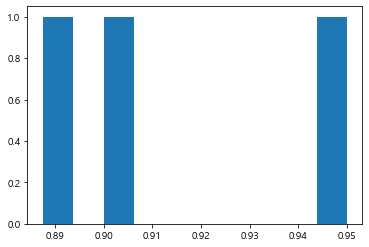

In [103]:
## 3가지 방법을 시각화해서 비교해보자.
plt.hist(mean_sc_list)

In [94]:
##교차검증결과 Decision Tree를 사용해서 테스트 해보기로 결정!

[**Decision Tree Parameters**]

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


<img src='https://github.com/jinhuioh/hi_ai_himedia/blob/master/data12/decisiontreeclassifier.png?raw=true' width=600 height=300>


<img src='https://raw.githubusercontent.com/aliciawill/python-data/master/data12/fun_params_show2.png'>

In [110]:
# ##하이퍼 파라메터=> gird search
# def grid_search(model, params, k=5):#cv는 꼭 kfold값이 필요하다@!(k값)
#     gs_model = GridSearchCV(model, params, cv=k)#모든파라메터에 대해 전부 적용시켜주는 모델 GridSearchCV() 
#     print(gs_model)

In [113]:
params = {#하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2=24가지의 경우의 수 생김.
    'max_depth':[3, 5, 7, 10],#key:하이퍼파라메터 명, values는 list타입이어야 함.
    'random_state': [1,3,5],
    'criterion':["gini", "entropy"]#혼란스러운 정도(분류의 정도)를 계산하는 기준
    
}

In [128]:
##하이퍼 파라메터=> gird search
def grid_search(model, params, k=5):#cv는 꼭 kfold값이 필요하다@!(k값)
    gs_model = GridSearchCV(model, params, cv=k)#모든파라메터에 대해 전부 적용시켜주는 모델 GridSearchCV() 
    #gs_model는 최적의 파라메터가 적용된 모델의 객체
    gs_model.fit(X_train, y_train)
    print(gs_model.best_estimator_)##최적의 파라메터가 적용된 모델 객체
    print('best_score_은>>> ',gs_model.best_score_)#최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params_은>>> ',gs_model.best_params_)#최적의 파라메터(grid_search를 통해서 찾은)
    print(gs_model)##grid_search객체

In [129]:
# 함수의 모든 파라메터를 보고 싶으면 함수명쓰고 shift+tab하면 됨
grid_search(dt, params, 5)#그리드서치의 모든경우의수는 24*5

DecisionTreeClassifier(max_depth=3, random_state=1)
best_score_은>>>  0.95
best_params_은>>>  {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [130]:
#그리드 서치를 통해서 찾은 최적의 파라메터는 {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}

In [132]:
##최적의 하이퍼 파라메터로 모델 객체를 생성해서 
##fit()시켜보자.
dt_gs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state= 1)#그리드 서치를 통해 찾은 최적의 파라메터 적용.
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [146]:
##테스트 데이터로 검증해보자.
def test_validation(model, X_test, y_test):
    predict_result = model.predict(X_test)#예측한 결과
    acc = accuracy_score(y_test, predict_result)
    print('accuracy>> ', acc)
    cf = confusion_matrix(y_test,predict_result)#답안지넣고, 예측값 넣고
    #실제(c)-->예측(c,sg),실제(sg)-->예측(c,sg)
    #이진분류(binary classification)인 경우에는
    #예측할 수 있는 경우의 수는 4가지이다.
    #4가지를 표 형태로 정리해주는 것이 confusion_matrix!
    #첫번째 행/렬은 c 두번째 행/렬은 sg, abc..순으로 들어감
    print('confusion_matrix>> \n', cf)
    ##confusion matrix는 binary classfication인 경우에는 보기가 괜찮으나,
    ##multi class classification인 경우에는 보기가 힘들다.
    #이럴 때 사용하는 것이 classification report이다.
    c_report = classification_report(y_test, predict_result)
    print('classification_report>> \n', c_report)
    

In [147]:
test_validation(dt_gs,X_test, y_test)
# c에 recall이 1.00이면, positive비율(100%)
sg에 recall 0.9이면, sg로 맞춘것 중에 sg가 9개

accuracy>>  0.95
confusion_matrix>> 
 [[10  0]
 [ 1  9]]
classification_report>> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [150]:
## c는 10개를 다 맞춤. sg는 9개를 맞추고, 1개를 c로 예측함(틀림)
## 정확도가 95%가 나왔음.
## acc = 10 + 9/ 10 + 9 + 1
## 정확도 = 
##               실제C:예측C + 실제SG:실제SG / 
##               실제C:예측C + 실제SG:실제SG + 실제C:예측SG + 실제SG예측C
test_validation(dt_gs, X_test, y_test)

accuracy>>  0.95
confusion_matrix>> 
 [[10  0]
 [ 1  9]]
classification_report>> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [151]:
## recall(재현율)
# 실제 C(10개)중에서, 예측한 값들을 보면 
#                                실제 C로 100% 정확하게 예측해냈고, 
#                                SG로 예측한 것은 없다.
# 실제 SG(10개)중에서, 예측한 값들을 보면 
#                               실제 SG로 예측한 것이 90%이고, 
#                               C로 예측한 것이 10%이다.

## precision(정밀도)
# 예측한 C(11개)중에서 
#                               실제 91%가 C였고, SG는 9%이다.
# 예측한 SG(9개)중에서 
#                               실제 100%가 SG였고, C는 없었다.

## f1-score는 재현율과 정밀도의 평균

## confusion-matrix에서 가로방향이 recall, 세로방향이 precision

In [152]:
## 정확도 체크, acc, recall, precision, f1-score
##  confusion matrix(혼동행렬)


In [149]:
y_test.value_counts()

C     10
SG    10
Name: Pos, dtype: int64

#### positive= 예측: 암환자 
#### True=실제 암환자 , False = 실제 일반환자

<img src ='https://github.com/jinhuioh/hi_ai_himedia/blob/master/data12/positiveNegative.PNG?raw=true'>

In [97]:
##정확도 체크,acc,recall,precision,f1-score
##confusion matrix(혼동행렬)